In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
sns.set_context('poster', font_scale=1.25)

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from LB_D2Q9 import pipe_cython as lb

We now want to visualize the evolution of the flow...let's see how it goes...

In [6]:
from IPython import display

In [22]:
#### Input to the simulation in SI ######
diameter = 1. # meters
length = 1. # meters

dr = 0.005 # lattice spacing
# How much you relax each iteration...related to viscosity
# Needs to be between .5 and 1.
omega = .999

viscosity = 10.**-1. # More viscous = easier to simulate!
print 'Desired viscosity:' , viscosity

input_velocity = 0.01 # meter/second

Re = (input_velocity * diameter)/viscosity
print 'Desired Re', Re

##### Derived parameters ######
# Re is set by diameter, input_velocity, and viscosity
# Adjust dr so that mach number doers not explode!
print
print '###### Simulation Parameters #########'
print

ly = int(np.ceil(diameter/dr))
lx = int(np.ceil(length/dr))
print 'ly', ly
print 'lx', lx

dt = ((dr**2)/(3*viscosity))*(omega-.5) # Seconds

print 'dt', dt

sim = lb.Pipe_Flow(lx=lx, ly=ly, dr=dr, dt=dt, omega=omega, 
                   input_velocity=input_velocity)

# U should be on the order of 0.1, 0.2 in the simulation!
print 'u_max in simulation:' , np.max(sim.u)

Desired viscosity: 0.1
Desired Re 0.1

###### Simulation Parameters #########

ly 200
lx 200
dt 4.15833333333e-05
Viscosity: 0.1
Re: 0.1
Ma: 0.000144048892163
u_max in simulation: 0.000465544942343


Oh wow, the mach number is *way* too high. Let's do a simulation in meters...

KeyboardInterrupt: 

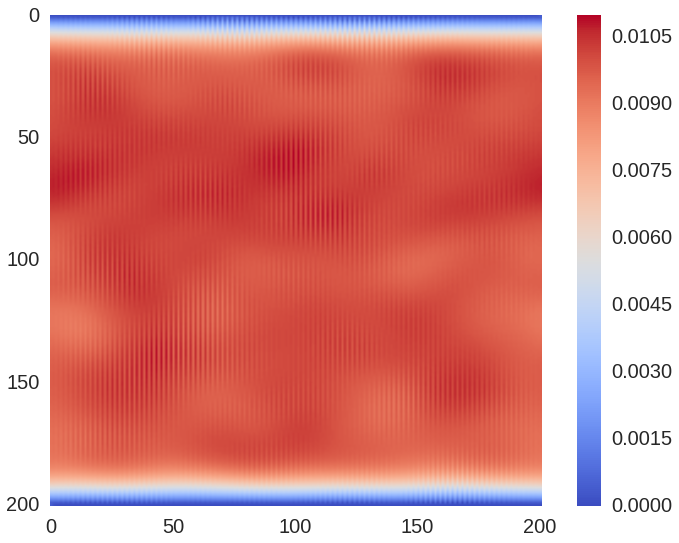

In [23]:
total_num_steps = 1000
steps_per_image= 10

num_to_record = int(np.ceil(float(total_num_steps)/steps_per_image))

plt.figure()
for i in range(num_to_record):
    velocity_magnitude = np.sqrt(sim.u**2 + sim.v**2)
    velocity_magnitude *= (sim.dr/sim.dt) # Scale appropriately
    plt.imshow(velocity_magnitude.T, cmap = cm.coolwarm)
    plt.grid(False)
    plt.clim(vmin=0, vmax=1.1*sim.input_velocity)
    if i == 0:
        plt.colorbar()
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
    sim.run(steps_per_image)
plt.clf() # This way a second figure does not appear at the end...

Cool. Let's say that we have constant input on the left and constant output on the right. Well, perhaps we could try to study an obstacle...that would be cool. Well...let's think. What next? We could start writing the slow pieces in opencl...

Well, this is promising. Excellent. What now? Let's try to visualize the flow...in real time.